# Summary
- the rand networks' layers look the same...

In [82]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
from ipywidgets import FloatSlider, interactive
import sys
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key

In [83]:
# loading in them all made my machine run out of memory
method_l = [
    "maxcorr", 
    "mincorr", 
    "maxlinreg", 
    "minlinreg", 
    "cca", 
    "lincka", 
    # "rbfcka",
]

In [84]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results13_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["cca"]["corrs"]]
network_l = sorted(network_l, key=network_sort_key)

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["cca"]["corrs"][network].values()))) # god this is a hack

In [85]:
network_l

['gpt2_medium-ptb_pos_dev.hdf5_0',
 'gpt2_medium-ptb_pos_dev.hdf5_1',
 'gpt2_medium-ptb_pos_dev.hdf5_2',
 'gpt2_medium-ptb_pos_dev.hdf5_3',
 'gpt2_medium-ptb_pos_dev.hdf5_4',
 'gpt2_medium-ptb_pos_dev.hdf5_5',
 'gpt2_medium-ptb_pos_dev.hdf5_6',
 'gpt2_medium-ptb_pos_dev.hdf5_7',
 'gpt2_medium-ptb_pos_dev.hdf5_8',
 'gpt2_medium-ptb_pos_dev.hdf5_9',
 'gpt2_medium-ptb_pos_dev.hdf5_10',
 'gpt2_medium-ptb_pos_dev.hdf5_11',
 'gpt2_medium-ptb_pos_dev.hdf5_12',
 'gpt2_medium-ptb_pos_dev.hdf5_13',
 'gpt2_medium-ptb_pos_dev.hdf5_14',
 'gpt2_medium-ptb_pos_dev.hdf5_15',
 'gpt2_medium-ptb_pos_dev.hdf5_16',
 'gpt2_medium-ptb_pos_dev.hdf5_17',
 'gpt2_medium-ptb_pos_dev.hdf5_18',
 'gpt2_medium-ptb_pos_dev.hdf5_19',
 'gpt2_medium-ptb_pos_dev.hdf5_20',
 'gpt2_medium-ptb_pos_dev.hdf5_21',
 'gpt2_medium-ptb_pos_dev.hdf5_22',
 'gpt2_medium-ptb_pos_dev.hdf5_23',
 'gpt2_medium-ptb_pos_dev_rand.hdf5_0',
 'gpt2_medium-ptb_pos_dev_rand.hdf5_1',
 'gpt2_medium-ptb_pos_dev_rand.hdf5_2',
 'gpt2_medium-ptb_pos_dev_

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [86]:
rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}

In [87]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [88]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [89]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

gpt2_medium-ptb_pos_dev.hdf5_0
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.791165  0.694307  0.752486
maxlinreg   0.791165   1.000000  0.538094  0.811927
mincorr     0.694307   0.538094  1.000000  0.509983
maxcorr     0.752486   0.811927  0.509983  1.000000
gpt2_medium-ptb_pos_dev.hdf5_1
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.506554  0.667279  0.358264
maxlinreg   0.506554   1.000000  0.215908  0.828639
mincorr     0.667279   0.215908  1.000000  0.139552
maxcorr     0.358264   0.828639  0.139552  1.000000
gpt2_medium-ptb_pos_dev.hdf5_2
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.401506  0.664656  0.317503
maxlinreg   0.401506   1.000000  0.169209  0.911981
mincorr     0.664656   0.169209  1.000000  0.130757
maxcorr     0.317503   0.911981  0.130757  1.000000
gpt2_medium-ptb_pos_dev.hdf5_3
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.393910  0.691513  0

           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.268485  0.766296  0.241620
maxlinreg   0.268485   1.000000  0.349577  0.751791
mincorr     0.766296   0.349577  1.000000  0.285690
maxcorr     0.241620   0.751791  0.285690  1.000000
gpt2_medium-ptb_pos_dev_rand.hdf5_17
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.284423  0.769536  0.262915
maxlinreg   0.284423   1.000000  0.359242  0.754056
mincorr     0.769536   0.359242  1.000000  0.329682
maxcorr     0.262915   0.754056  0.329682  1.000000
gpt2_medium-ptb_pos_dev_rand.hdf5_18
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.270862  0.773531  0.236153
maxlinreg   0.270862   1.000000  0.345658  0.756066
mincorr     0.773531   0.345658  1.000000  0.318089
maxcorr     0.236153   0.756066  0.318089  1.000000
gpt2_medium-ptb_pos_dev_rand.hdf5_19
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.287097  0.779059  0.267104
maxli

           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.186428  0.703966  0.112815
maxlinreg   0.186428   1.000000  0.295903  0.730335
mincorr     0.703966   0.295903  1.000000  0.184949
maxcorr     0.112815   0.730335  0.184949  1.000000
gpt2_small-ptb_pos_dev_rand.hdf5_9
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.205246  0.717472  0.170167
maxlinreg   0.205246   1.000000  0.310089  0.720999
mincorr     0.717472   0.310089  1.000000  0.245039
maxcorr     0.170167   0.720999  0.245039  1.000000
gpt2_small-ptb_pos_dev_rand.hdf5_10
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.168267  0.703913  0.168700
maxlinreg   0.168267   1.000000  0.317541  0.717482
mincorr     0.703913   0.317541  1.000000  0.242583
maxcorr     0.168700   0.717482  0.242583  1.000000
gpt2_small-ptb_pos_dev_rand.hdf5_11
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.189642  0.702213  0.149991
maxlinreg

           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.826104  0.764453  0.658977
maxlinreg   0.826104   1.000000  0.582644  0.728601
mincorr     0.764453   0.582644  1.000000  0.466557
maxcorr     0.658977   0.728601  0.466557  1.000000
xlnet_large_cased-ptb_pos_dev_rand.hdf5_4
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.804470  0.753539  0.673416
maxlinreg   0.804470   1.000000  0.555288  0.747544
mincorr     0.753539   0.555288  1.000000  0.487520
maxcorr     0.673416   0.747544  0.487520  1.000000
xlnet_large_cased-ptb_pos_dev_rand.hdf5_5
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.805088  0.759587  0.634293
maxlinreg   0.805088   1.000000  0.547184  0.739877
mincorr     0.759587   0.547184  1.000000  0.452355
maxcorr     0.634293   0.739877  0.452355  1.000000
xlnet_large_cased-ptb_pos_dev_rand.hdf5_6
           minlinreg  maxlinreg   mincorr   maxcorr
minlinreg   1.000000   0.796385  0.738922 

### Distributions

In [90]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



gpt2_medium-ptb_pos_dev.hdf5_0:

minlinreg

maxcounts
gpt2_small-ptb_pos_dev.hdf5_0     756
gpt2_medium-ptb_pos_dev.hdf5_1    268
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          870
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     49
gpt2_small-ptb_pos_dev_rand.hdf5_11            41
gpt2_medium-ptb_pos_dev_rand.hdf5_22           30
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       23
gpt2_medium-ptb_pos_dev_rand.hdf5_21            6
gpt2_small-ptb_pos_dev_rand.hdf5_10             2
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1        1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_11       1
gpt2_medium-ptb_pos_dev_rand.hdf5_20            1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.791162  0.845760
min  0.791162  1.000000  0.721498
med  0.845760  0.721498  1.000000

maxlinreg

maxcounts
gpt2_small-ptb_pos_dev.hdf5_0     756
gpt2_medium-ptb_pos_dev.hdf5_1    268
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          870
xlnet_lar

          max       min       med
max  1.000000  0.139552  0.446568
min  0.139552  1.000000  0.313494
med  0.446568  0.313494  1.000000


gpt2_medium-ptb_pos_dev.hdf5_2:

minlinreg

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_3    1022
gpt2_medium-ptb_pos_dev.hdf5_1       2
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          873
gpt2_small-ptb_pos_dev_rand.hdf5_11            73
gpt2_medium-ptb_pos_dev_rand.hdf5_22           45
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     15
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0        7
gpt2_medium-ptb_pos_dev_rand.hdf5_21            7
xlnet_base_cased-ptb_pos_dev_rand.hdf5_11       1
gpt2_small-ptb_pos_dev_rand.hdf5_10             1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_22      1
gpt2_medium-ptb_pos_dev_rand.hdf5_20            1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.401515  0.694948
min  0.401515  1.000000  0.567099
med  0.694948  0.567099  1.000000

maxlinreg

maxcounts
gpt2_medium-ptb_pos_d

gpt2_medium-ptb_pos_dev_rand.hdf5_23          776
gpt2_small-ptb_pos_dev_rand.hdf5_11           140
gpt2_medium-ptb_pos_dev_rand.hdf5_22           58
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     19
gpt2_medium-ptb_pos_dev_rand.hdf5_21           16
gpt2_small-ptb_pos_dev_rand.hdf5_10             5
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0        5
gpt2_medium-ptb_pos_dev_rand.hdf5_19            2
gpt2_medium-ptb_pos_dev_rand.hdf5_17            1
gpt2_medium-ptb_pos_dev_rand.hdf5_20            1
gpt2_small-ptb_pos_dev_rand.hdf5_9              1
dtype: int64

corr_df_pctl
         max       min       med
max  1.00000  0.480760  0.731350
min  0.48076  1.000000  0.764256
med  0.73135  0.764256  1.000000

maxlinreg

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_6    1015
gpt2_medium-ptb_pos_dev.hdf5_4       9
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          776
gpt2_small-ptb_pos_dev_rand.hdf5_11           140
gpt2_medium-ptb_pos_dev_rand.hdf5_22           58
xlnet_large_cased

gpt2_medium-ptb_pos_dev_rand.hdf5_23          126
gpt2_medium-ptb_pos_dev_rand.hdf5_22           77
gpt2_medium-ptb_pos_dev_rand.hdf5_21           59
gpt2_small-ptb_pos_dev_rand.hdf5_11            56
gpt2_medium-ptb_pos_dev_rand.hdf5_19           49
gpt2_medium-ptb_pos_dev_rand.hdf5_15           48
gpt2_medium-ptb_pos_dev_rand.hdf5_16           48
gpt2_medium-ptb_pos_dev_rand.hdf5_18           38
gpt2_medium-ptb_pos_dev_rand.hdf5_14           38
gpt2_medium-ptb_pos_dev_rand.hdf5_17           37
gpt2_medium-ptb_pos_dev_rand.hdf5_20           36
gpt2_medium-ptb_pos_dev_rand.hdf5_13           36
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     34
gpt2_medium-ptb_pos_dev_rand.hdf5_11           33
gpt2_small-ptb_pos_dev_rand.hdf5_10            30
xlnet_large_cased-ptb_pos_dev.hdf5_23          29
gpt2_medium-ptb_pos_dev_rand.hdf5_10           26
gpt2_medium-ptb_pos_dev_rand.hdf5_12           25
gpt2_small-ptb_pos_dev_rand.hdf5_8             23
gpt2_small-ptb_pos_dev_rand.hdf5_9             20


          max       min       med
max  1.000000  0.322296  0.523668
min  0.322296  1.000000  0.375689
med  0.523668  0.375689  1.000000

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_9          941
gpt2_medium-ptb_pos_dev.hdf5_7           81
gpt2_small-ptb_pos_dev.hdf5_4             1
xlnet_large_cased-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          128
gpt2_medium-ptb_pos_dev_rand.hdf5_22           81
gpt2_small-ptb_pos_dev_rand.hdf5_11            67
gpt2_medium-ptb_pos_dev_rand.hdf5_21           55
gpt2_medium-ptb_pos_dev_rand.hdf5_14           51
gpt2_medium-ptb_pos_dev_rand.hdf5_19           49
gpt2_medium-ptb_pos_dev_rand.hdf5_20           44
gpt2_medium-ptb_pos_dev_rand.hdf5_16           40
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     38
gpt2_medium-ptb_pos_dev_rand.hdf5_13           38
gpt2_medium-ptb_pos_dev_rand.hdf5_17           38
gpt2_medium-ptb_pos_dev_rand.hdf5_12           33
gpt2_medium-ptb_pos_dev_rand.hdf5_18        

          max      min       med
max  1.000000  0.53999  0.675371
min  0.539990  1.00000  0.839600
med  0.675371  0.83960  1.000000

mincorr

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_11    698
gpt2_medium-ptb_pos_dev.hdf5_9     325
gpt2_small-ptb_pos_dev.hdf5_4        1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          112
gpt2_small-ptb_pos_dev_rand.hdf5_11            68
gpt2_medium-ptb_pos_dev_rand.hdf5_22           64
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     55
gpt2_medium-ptb_pos_dev_rand.hdf5_21           48
gpt2_medium-ptb_pos_dev_rand.hdf5_20           48
gpt2_medium-ptb_pos_dev_rand.hdf5_14           46
gpt2_medium-ptb_pos_dev_rand.hdf5_16           42
gpt2_medium-ptb_pos_dev_rand.hdf5_15           41
gpt2_medium-ptb_pos_dev_rand.hdf5_17           39
gpt2_medium-ptb_pos_dev_rand.hdf5_19           38
gpt2_medium-ptb_pos_dev_rand.hdf5_12           35
gpt2_medium-ptb_pos_dev_rand.hdf5_18           34
gpt2_medium-ptb_pos_dev_rand.hdf5_13           34
gpt2_sm

          max       min       med
max  1.000000  0.555193  0.671092
min  0.555193  1.000000  0.822815
med  0.671092  0.822815  1.000000

maxlinreg

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_13    1020
gpt2_medium-ptb_pos_dev.hdf5_11       3
gpt2_medium-ptb_pos_dev.hdf5_9        1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          563
gpt2_small-ptb_pos_dev_rand.hdf5_11           310
gpt2_medium-ptb_pos_dev_rand.hdf5_22           70
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     19
gpt2_small-ptb_pos_dev_rand.hdf5_10            18
gpt2_medium-ptb_pos_dev_rand.hdf5_21           18
gpt2_medium-ptb_pos_dev_rand.hdf5_20            8
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0        7
gpt2_small-ptb_pos_dev_rand.hdf5_9              5
gpt2_medium-ptb_pos_dev_rand.hdf5_19            3
gpt2_medium-ptb_pos_dev_rand.hdf5_18            2
gpt2_medium-ptb_pos_dev_rand.hdf5_16            1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.555193  0.671092
min

gpt2_medium-ptb_pos_dev.hdf5_16    995
gpt2_medium-ptb_pos_dev.hdf5_14     27
gpt2_medium-ptb_pos_dev.hdf5_9       1
gpt2_medium-ptb_pos_dev.hdf5_17      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          494
gpt2_small-ptb_pos_dev_rand.hdf5_11           393
gpt2_medium-ptb_pos_dev_rand.hdf5_22           59
gpt2_small-ptb_pos_dev_rand.hdf5_10            24
gpt2_medium-ptb_pos_dev_rand.hdf5_21           18
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     14
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0        8
gpt2_medium-ptb_pos_dev_rand.hdf5_20            6
gpt2_small-ptb_pos_dev_rand.hdf5_9              4
gpt2_medium-ptb_pos_dev_rand.hdf5_19            3
xlnet_base_cased-ptb_pos_dev_rand.hdf5_9        1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.610350  0.697286
min  0.610350  1.000000  0.815481
med  0.697286  0.815481  1.000000

mincorr

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_16    601
gpt2_medium-ptb_pos_dev.hdf5_14    421
gpt2_medi

gpt2_small-ptb_pos_dev_rand.hdf5_11           471
gpt2_medium-ptb_pos_dev_rand.hdf5_23          358
gpt2_medium-ptb_pos_dev_rand.hdf5_22           55
gpt2_small-ptb_pos_dev_rand.hdf5_10            50
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       21
gpt2_small-ptb_pos_dev_rand.hdf5_9             18
gpt2_medium-ptb_pos_dev_rand.hdf5_21           18
gpt2_medium-ptb_pos_dev_rand.hdf5_20           14
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     10
gpt2_medium-ptb_pos_dev_rand.hdf5_19            5
gpt2_small-ptb_pos_dev_rand.hdf5_8              3
xlnet_base_cased-ptb_pos_dev_rand.hdf5_8        1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.623003  0.676561
min  0.623003  1.000000  0.797026
med  0.676561  0.797026  1.000000

maxlinreg

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_19    1009
gpt2_medium-ptb_pos_dev.hdf5_17      15
dtype: int64

mincounts
gpt2_small-ptb_pos_dev_rand.hdf5_11           471
gpt2_medium-ptb_pos_dev_rand.hdf5_23          358
gpt2_medium


maxcounts
gpt2_medium-ptb_pos_dev.hdf5_22    593
gpt2_medium-ptb_pos_dev.hdf5_20    431
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          82
gpt2_small-ptb_pos_dev_rand.hdf5_11           58
gpt2_medium-ptb_pos_dev_rand.hdf5_22          55
gpt2_small-ptb_pos_dev_rand.hdf5_0            50
gpt2_medium-ptb_pos_dev_rand.hdf5_21          42
                                              ..
xlnet_large_cased-ptb_pos_dev.hdf5_1           1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_5      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_7      1
gpt2_small-ptb_pos_dev_rand.hdf5_1             1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_10     1
Length: 72, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.328422  0.529288
min  0.328422  1.000000  0.487361
med  0.529288  0.487361  1.000000


gpt2_medium-ptb_pos_dev.hdf5_22:

minlinreg

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_23    1009
gpt2_medium-ptb_pos_dev.hdf5_21      15
dtype: int64

mincounts
gpt2_small-p

gpt2_medium-ptb_pos_dev_rand.hdf5_2    1019
gpt2_medium-ptb_pos_dev_rand.hdf5_3       4
gpt2_small-ptb_pos_dev.hdf5_0             1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         482
xlnet_base_cased-ptb_pos_dev.hdf5_0            94
xlnet_large_cased-ptb_pos_dev.hdf5_0           39
xlnet_large_cased-ptb_pos_dev.hdf5_2           36
xlnet_base_cased-ptb_pos_dev.hdf5_1            24
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       23
xlnet_large_cased-ptb_pos_dev.hdf5_1           21
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       21
xlnet_large_cased-ptb_pos_dev.hdf5_22          17
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       17
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       16
xlnet_base_cased-ptb_pos_dev_rand.hdf5_9       15
xlnet_large_cased-ptb_pos_dev.hdf5_21          15
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1      14
xlnet_base_cased-ptb_pos_dev_rand.hdf5_8       14
xlnet_large_cased-ptb_pos_dev.hdf5_20          13
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0   


maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_4    955
gpt2_medium-ptb_pos_dev_rand.hdf5_2     69
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         326
xlnet_base_cased-ptb_pos_dev.hdf5_0           131
xlnet_large_cased-ptb_pos_dev.hdf5_0           52
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       45
xlnet_large_cased-ptb_pos_dev.hdf5_2           45
xlnet_large_cased-ptb_pos_dev.hdf5_1           37
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       25
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      25
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       25
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       25
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       23
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       19
xlnet_base_cased-ptb_pos_dev_rand.hdf5_11      17
xlnet_large_cased-ptb_pos_dev.hdf5_22          17
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1      17
xlnet_base_cased-ptb_pos_dev_rand.hdf5_9       16
xlnet_base_cased-ptb_pos_dev_rand.hdf5_10      15
xlnet_base_cased-ptb_pos_dev_


maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_6    868
gpt2_medium-ptb_pos_dev_rand.hdf5_4    156
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         299
xlnet_base_cased-ptb_pos_dev.hdf5_0           107
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       72
xlnet_large_cased-ptb_pos_dev.hdf5_2           57
xlnet_large_cased-ptb_pos_dev.hdf5_1           49
xlnet_large_cased-ptb_pos_dev.hdf5_0           42
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       38
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       33
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      33
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       28
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       20
xlnet_base_cased-ptb_pos_dev_rand.hdf5_9       18
xlnet_large_cased-ptb_pos_dev.hdf5_22          17
xlnet_base_cased-ptb_pos_dev.hdf5_1            17
xlnet_base_cased-ptb_pos_dev_rand.hdf5_7       17
xlnet_large_cased-ptb_pos_dev_rand.hdf5_2      16
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       15
xlnet_base_cased-ptb_pos_dev_

gpt2_medium-ptb_pos_dev_rand.hdf5_8    1022
gpt2_medium-ptb_pos_dev_rand.hdf5_6       2
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0    858
xlnet_base_cased-ptb_pos_dev.hdf5_0         166
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.274207  0.717820
min  0.274207  1.000000  0.394424
med  0.717820  0.394424  1.000000

mincorr

maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_8    760
gpt2_medium-ptb_pos_dev_rand.hdf5_6    264
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         255
xlnet_base_cased-ptb_pos_dev.hdf5_0           120
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       63
xlnet_large_cased-ptb_pos_dev.hdf5_2           56
xlnet_large_cased-ptb_pos_dev.hdf5_1           54
xlnet_large_cased-ptb_pos_dev.hdf5_0           42
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       39
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      35
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       30
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       28

xlnet_base_cased-ptb_pos_dev_rand.hdf5_0    874
xlnet_base_cased-ptb_pos_dev.hdf5_0         150
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.259319  0.676474
min  0.259319  1.000000  0.412062
med  0.676474  0.412062  1.000000

maxlinreg

maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_10    999
gpt2_medium-ptb_pos_dev_rand.hdf5_8      25
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0    874
xlnet_base_cased-ptb_pos_dev.hdf5_0         150
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.259319  0.676474
min  0.259319  1.000000  0.412062
med  0.676474  0.412062  1.000000

mincorr

maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_10    722
gpt2_medium-ptb_pos_dev_rand.hdf5_8     302
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         229
xlnet_base_cased-ptb_pos_dev.hdf5_0           118
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       66
xlnet_large_cased-ptb_pos_dev.hdf5_1           60
xlnet_large_case


maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_12    699
gpt2_medium-ptb_pos_dev_rand.hdf5_10    325
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         191
xlnet_base_cased-ptb_pos_dev.hdf5_0           133
xlnet_large_cased-ptb_pos_dev.hdf5_1           76
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       66
xlnet_large_cased-ptb_pos_dev.hdf5_2           62
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       45
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       40
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       40
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      39
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       29
xlnet_large_cased-ptb_pos_dev.hdf5_0           29
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       27
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       26
xlnet_base_cased-ptb_pos_dev_rand.hdf5_8       21
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1      19
xlnet_base_cased-ptb_pos_dev_rand.hdf5_7       17
xlnet_large_cased-ptb_pos_dev_rand.hdf5_2      16
xlnet_base_cased-ptb_pos_de


maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_13    617
gpt2_medium-ptb_pos_dev_rand.hdf5_11    407
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         185
xlnet_base_cased-ptb_pos_dev.hdf5_0           124
xlnet_large_cased-ptb_pos_dev.hdf5_1           77
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       74
xlnet_large_cased-ptb_pos_dev.hdf5_2           53
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       49
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      49
xlnet_large_cased-ptb_pos_dev.hdf5_0           42
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       36
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       34
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       26
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       23
xlnet_base_cased-ptb_pos_dev_rand.hdf5_8       23
xlnet_large_cased-ptb_pos_dev.hdf5_22          22
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       21
xlnet_base_cased-ptb_pos_dev.hdf5_1            21
xlnet_base_cased-ptb_pos_dev_rand.hdf5_7       17
xlnet_large_cased-ptb_pos_d


maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_15    645
gpt2_medium-ptb_pos_dev_rand.hdf5_13    379
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         178
xlnet_base_cased-ptb_pos_dev.hdf5_0           123
xlnet_large_cased-ptb_pos_dev.hdf5_1           81
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       76
xlnet_large_cased-ptb_pos_dev.hdf5_2           63
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       52
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       38
xlnet_large_cased-ptb_pos_dev.hdf5_0           36
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      36
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       35
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       33
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       25
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1      23
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       21
xlnet_base_cased-ptb_pos_dev_rand.hdf5_7       18
xlnet_large_cased-ptb_pos_dev.hdf5_22          17
xlnet_base_cased-ptb_pos_dev.hdf5_1            17
xlnet_large_cased-ptb_pos_d

          max       min       med
max  1.000000  0.286065  0.452032
min  0.286065  1.000000  0.637747
med  0.452032  0.637747  1.000000

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_17    631
gpt2_medium-ptb_pos_dev_rand.hdf5_15    393
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         165
xlnet_base_cased-ptb_pos_dev.hdf5_0           115
xlnet_large_cased-ptb_pos_dev.hdf5_1           84
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       76
xlnet_large_cased-ptb_pos_dev.hdf5_2           71
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       48
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       38
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      38
xlnet_large_cased-ptb_pos_dev.hdf5_0           37
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       36
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       31
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1      24
xlnet_base_cased-ptb_pos_dev.hdf5_1            23
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       23
xlnet_large_cased-ptb_pos_dev_ra


maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_19    644
gpt2_medium-ptb_pos_dev_rand.hdf5_17    380
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         164
xlnet_base_cased-ptb_pos_dev.hdf5_0           127
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       88
xlnet_large_cased-ptb_pos_dev.hdf5_1           71
xlnet_large_cased-ptb_pos_dev.hdf5_2           56
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      53
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       42
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       37
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       35
xlnet_large_cased-ptb_pos_dev.hdf5_0           34
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       33
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       31
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       26
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1      24
xlnet_base_cased-ptb_pos_dev_rand.hdf5_8       22
xlnet_base_cased-ptb_pos_dev_rand.hdf5_7       21
xlnet_base_cased-ptb_pos_dev_rand.hdf5_9       20
xlnet_large_cased-ptb_pos_d

          max       min       med
max  1.000000  0.314837  0.433803
min  0.314837  1.000000  0.641124
med  0.433803  0.641124  1.000000


gpt2_medium-ptb_pos_dev_rand.hdf5_20:

minlinreg

maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_21    780
gpt2_medium-ptb_pos_dev_rand.hdf5_19    244
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0    850
xlnet_base_cased-ptb_pos_dev.hdf5_0         174
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.304942  0.630828
min  0.304942  1.000000  0.467064
med  0.630828  0.467064  1.000000

maxlinreg

maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_21    780
gpt2_medium-ptb_pos_dev_rand.hdf5_19    244
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0    850
xlnet_base_cased-ptb_pos_dev.hdf5_0         174
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.304942  0.630828
min  0.304942  1.000000  0.467064
med  0.630828  0.467064  1.000000

mincorr

maxcounts
gpt2_medium-ptb_po

xlnet_base_cased-ptb_pos_dev_rand.hdf5_0    832
xlnet_base_cased-ptb_pos_dev.hdf5_0         192
dtype: int64

corr_df_pctl
          max       min      med
max  1.000000  0.297545  0.60918
min  0.297545  1.000000  0.48004
med  0.609180  0.480040  1.00000

mincorr

maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23    638
gpt2_medium-ptb_pos_dev_rand.hdf5_21    386
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         156
xlnet_base_cased-ptb_pos_dev.hdf5_0           128
xlnet_large_cased-ptb_pos_dev.hdf5_1           85
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       80
xlnet_large_cased-ptb_pos_dev.hdf5_2           71
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      53
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       49
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       41
xlnet_large_cased-ptb_pos_dev.hdf5_0           35
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       33
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       30
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       29
xlnet_large_c

          max       min       med
max  1.000000  0.678274  0.856116
min  0.678274  1.000000  0.680377
med  0.856116  0.680377  1.000000

maxlinreg

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_0    768
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          626
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     52
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       42
gpt2_small-ptb_pos_dev_rand.hdf5_11            23
gpt2_medium-ptb_pos_dev_rand.hdf5_22           21
gpt2_medium-ptb_pos_dev_rand.hdf5_21            3
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5        1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.678274  0.856116
min  0.678274  1.000000  0.680377
med  0.856116  0.680377  1.000000

mincorr

maxcounts
gpt2_small-ptb_pos_dev.hdf5_1                 338
gpt2_medium-ptb_pos_dev.hdf5_0                149
gpt2_small-ptb_pos_dev.hdf5_2                  26
xlnet_large_cased-ptb_pos_dev.hdf5_1           24
xlnet_large_cased-ptb_pos_dev.hdf5_0           

          max       min       med
max  1.000000  0.557334  0.731364
min  0.557334  1.000000  0.571675
med  0.731364  0.571675  1.000000


gpt2_small-ptb_pos_dev.hdf5_1:

minlinreg

maxcounts
gpt2_small-ptb_pos_dev.hdf5_2    768
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          635
gpt2_small-ptb_pos_dev_rand.hdf5_11            54
gpt2_medium-ptb_pos_dev_rand.hdf5_22           30
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     30
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       13
gpt2_medium-ptb_pos_dev_rand.hdf5_21            4
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1        1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_11       1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.538496  0.661994
min  0.538496  1.000000  0.654422
med  0.661994  0.654422  1.000000

maxlinreg

maxcounts
gpt2_small-ptb_pos_dev.hdf5_2    768
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          635
gpt2_small-ptb_pos_dev_rand.hdf5_11            54
gp


maxcounts
gpt2_small-ptb_pos_dev.hdf5_4    766
gpt2_small-ptb_pos_dev.hdf5_2      2
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          616
gpt2_small-ptb_pos_dev_rand.hdf5_11            78
gpt2_medium-ptb_pos_dev_rand.hdf5_22           35
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     19
gpt2_medium-ptb_pos_dev_rand.hdf5_21            9
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0        7
gpt2_medium-ptb_pos_dev_rand.hdf5_20            3
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1        1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.414511  0.696533
min  0.414511  1.000000  0.716777
med  0.696533  0.716777  1.000000

maxlinreg

maxcounts
gpt2_small-ptb_pos_dev.hdf5_4    766
gpt2_small-ptb_pos_dev.hdf5_2      2
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          616
gpt2_small-ptb_pos_dev_rand.hdf5_11            78
gpt2_medium-ptb_pos_dev_rand.hdf5_22           35
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     19
gpt2_med


maxcounts
gpt2_small-ptb_pos_dev.hdf5_5     746
gpt2_small-ptb_pos_dev.hdf5_3      21
gpt2_small-ptb_pos_dev.hdf5_11      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          114
gpt2_medium-ptb_pos_dev_rand.hdf5_20           52
gpt2_small-ptb_pos_dev_rand.hdf5_11            47
gpt2_medium-ptb_pos_dev_rand.hdf5_22           47
gpt2_medium-ptb_pos_dev_rand.hdf5_21           41
gpt2_medium-ptb_pos_dev_rand.hdf5_13           36
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     35
gpt2_medium-ptb_pos_dev_rand.hdf5_14           32
gpt2_medium-ptb_pos_dev_rand.hdf5_15           29
gpt2_medium-ptb_pos_dev_rand.hdf5_19           29
gpt2_medium-ptb_pos_dev_rand.hdf5_18           26
xlnet_large_cased-ptb_pos_dev.hdf5_23          25
gpt2_medium-ptb_pos_dev_rand.hdf5_16           24
gpt2_medium-ptb_pos_dev_rand.hdf5_17           23
gpt2_small-ptb_pos_dev_rand.hdf5_10            20
xlnet_large_cased-ptb_pos_dev_rand.hdf5_22     20
gpt2_medium-ptb_pos_dev_rand.hdf5_12           19
g

          max       min       med
max  1.000000  0.300267  0.561340
min  0.300267  1.000000  0.391798
med  0.561340  0.391798  1.000000

maxcorr

maxcounts
gpt2_small-ptb_pos_dev.hdf5_6    472
gpt2_small-ptb_pos_dev.hdf5_4    295
gpt2_small-ptb_pos_dev.hdf5_7      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          113
gpt2_medium-ptb_pos_dev_rand.hdf5_22           56
gpt2_medium-ptb_pos_dev_rand.hdf5_20           48
gpt2_small-ptb_pos_dev_rand.hdf5_11            42
gpt2_medium-ptb_pos_dev_rand.hdf5_21           41
gpt2_medium-ptb_pos_dev_rand.hdf5_15           37
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     34
gpt2_medium-ptb_pos_dev_rand.hdf5_19           33
gpt2_medium-ptb_pos_dev_rand.hdf5_14           33
gpt2_medium-ptb_pos_dev_rand.hdf5_16           31
gpt2_medium-ptb_pos_dev_rand.hdf5_17           28
gpt2_medium-ptb_pos_dev_rand.hdf5_18           21
gpt2_small-ptb_pos_dev_rand.hdf5_9             20
gpt2_medium-ptb_pos_dev_rand.hdf5_13           18
gpt2_medi


maxcounts
gpt2_small-ptb_pos_dev.hdf5_6    526
gpt2_small-ptb_pos_dev.hdf5_8    240
gpt2_small-ptb_pos_dev.hdf5_4      2
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          100
gpt2_medium-ptb_pos_dev_rand.hdf5_20           51
gpt2_medium-ptb_pos_dev_rand.hdf5_22           46
gpt2_small-ptb_pos_dev_rand.hdf5_11            45
gpt2_medium-ptb_pos_dev_rand.hdf5_21           37
gpt2_medium-ptb_pos_dev_rand.hdf5_15           33
gpt2_medium-ptb_pos_dev_rand.hdf5_16           32
gpt2_medium-ptb_pos_dev_rand.hdf5_18           31
gpt2_medium-ptb_pos_dev_rand.hdf5_14           28
gpt2_medium-ptb_pos_dev_rand.hdf5_19           27
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23     26
gpt2_medium-ptb_pos_dev_rand.hdf5_13           26
xlnet_large_cased-ptb_pos_dev_rand.hdf5_22     23
gpt2_medium-ptb_pos_dev_rand.hdf5_17           23
gpt2_small-ptb_pos_dev_rand.hdf5_10            23
gpt2_medium-ptb_pos_dev_rand.hdf5_12           22
gpt2_medium-ptb_pos_dev_rand.hdf5_11           14
gpt2


maxcounts
gpt2_small-ptb_pos_dev.hdf5_7    657
gpt2_small-ptb_pos_dev.hdf5_9    108
gpt2_small-ptb_pos_dev.hdf5_4      2
gpt2_small-ptb_pos_dev.hdf5_6      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          90
gpt2_small-ptb_pos_dev_rand.hdf5_11           51
gpt2_medium-ptb_pos_dev_rand.hdf5_22          49
gpt2_medium-ptb_pos_dev_rand.hdf5_21          39
gpt2_medium-ptb_pos_dev_rand.hdf5_18          32
gpt2_medium-ptb_pos_dev_rand.hdf5_20          32
gpt2_medium-ptb_pos_dev_rand.hdf5_19          31
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23    30
gpt2_medium-ptb_pos_dev_rand.hdf5_13          28
gpt2_medium-ptb_pos_dev_rand.hdf5_14          27
gpt2_medium-ptb_pos_dev_rand.hdf5_16          26
gpt2_medium-ptb_pos_dev_rand.hdf5_12          25
gpt2_medium-ptb_pos_dev_rand.hdf5_17          24
gpt2_medium-ptb_pos_dev_rand.hdf5_15          20
gpt2_small-ptb_pos_dev_rand.hdf5_8            16
gpt2_small-ptb_pos_dev_rand.hdf5_10           16
gpt2_small-ptb_pos_dev_rand.hdf5_

          max       min       med
max  1.000000  0.291048  0.574338
min  0.291048  1.000000  0.421299
med  0.574338  0.421299  1.000000


gpt2_small-ptb_pos_dev.hdf5_10:

minlinreg

maxcounts
gpt2_small-ptb_pos_dev.hdf5_11    550
gpt2_small-ptb_pos_dev.hdf5_9     218
dtype: int64

mincounts
gpt2_small-ptb_pos_dev_rand.hdf5_11           333
gpt2_medium-ptb_pos_dev_rand.hdf5_23          315
gpt2_medium-ptb_pos_dev_rand.hdf5_22           45
gpt2_small-ptb_pos_dev_rand.hdf5_10            26
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       16
gpt2_medium-ptb_pos_dev_rand.hdf5_21           16
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23      8
gpt2_medium-ptb_pos_dev_rand.hdf5_20            6
gpt2_small-ptb_pos_dev_rand.hdf5_9              2
gpt2_medium-ptb_pos_dev_rand.hdf5_19            1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.632319  0.721890
min  0.632319  1.000000  0.772328
med  0.721890  0.772328  1.000000

maxlinreg

maxcounts
gpt2_small-ptb_pos_dev.


maxcounts
gpt2_small-ptb_pos_dev_rand.hdf5_2    766
gpt2_small-ptb_pos_dev_rand.hdf5_3      2
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         453
xlnet_base_cased-ptb_pos_dev.hdf5_0            51
xlnet_large_cased-ptb_pos_dev.hdf5_2           20
xlnet_large_cased-ptb_pos_dev.hdf5_0           18
xlnet_large_cased-ptb_pos_dev.hdf5_1           18
xlnet_large_cased-ptb_pos_dev.hdf5_22          17
xlnet_large_cased-ptb_pos_dev.hdf5_21          16
xlnet_large_cased-ptb_pos_dev.hdf5_3           10
xlnet_large_cased-ptb_pos_dev.hdf5_18          10
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3        9
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2        9
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6        8
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1        7
xlnet_base_cased-ptb_pos_dev_rand.hdf5_8        7
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0        7
xlnet_base_cased-ptb_pos_dev_rand.hdf5_9        7
xlnet_base_cased-ptb_pos_dev_rand.hdf5_11       7
xlnet_base_cased-ptb_pos_dev_ra

          max       min       med
max  1.000000  0.257937  0.361921
min  0.257937  1.000000  0.705874
med  0.361921  0.705874  1.000000


gpt2_small-ptb_pos_dev_rand.hdf5_3:

minlinreg

maxcounts
gpt2_small-ptb_pos_dev_rand.hdf5_4    768
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0    646
xlnet_base_cased-ptb_pos_dev.hdf5_0         120
xlnet_large_cased-ptb_pos_dev.hdf5_23         2
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.141706  0.632272
min  0.141706  1.000000  0.403435
med  0.632272  0.403435  1.000000

maxlinreg

maxcounts
gpt2_small-ptb_pos_dev_rand.hdf5_4    768
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0    646
xlnet_base_cased-ptb_pos_dev.hdf5_0         120
xlnet_large_cased-ptb_pos_dev.hdf5_23         2
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.141706  0.632272
min  0.141706  1.000000  0.403435
med  0.632272  0.403435  1.000000

mincorr

maxcounts
gpt2_small-ptb_p

          max       min       med
max  1.000000  0.180125  0.628406
min  0.180125  1.000000  0.433975
med  0.628406  0.433975  1.000000

mincorr

maxcounts
gpt2_small-ptb_pos_dev_rand.hdf5_6    620
gpt2_small-ptb_pos_dev_rand.hdf5_4    148
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         281
xlnet_base_cased-ptb_pos_dev.hdf5_0            98
xlnet_large_cased-ptb_pos_dev.hdf5_1           45
xlnet_large_cased-ptb_pos_dev.hdf5_2           35
xlnet_large_cased-ptb_pos_dev.hdf5_0           32
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       25
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       22
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       20
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       19
xlnet_base_cased-ptb_pos_dev.hdf5_1            15
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      14
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       14
xlnet_large_cased-ptb_pos_dev.hdf5_3           13
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       13
xlnet_large_cased-ptb_pos_dev.hdf5_2


maxcounts
gpt2_small-ptb_pos_dev_rand.hdf5_8    554
gpt2_small-ptb_pos_dev_rand.hdf5_6    214
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         251
xlnet_base_cased-ptb_pos_dev.hdf5_0           100
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       42
xlnet_large_cased-ptb_pos_dev.hdf5_1           33
xlnet_large_cased-ptb_pos_dev.hdf5_2           28
                                             ... 
xlnet_large_cased-ptb_pos_dev.hdf5_15           1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_17      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_11      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_6       1
xlnet_base_cased-ptb_pos_dev.hdf5_5             1
Length: 61, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.233414  0.331297
min  0.233414  1.000000  0.681803
med  0.331297  0.681803  1.000000

maxcorr

maxcounts
gpt2_small-ptb_pos_dev_rand.hdf5_8    554
gpt2_small-ptb_pos_dev_rand.hdf5_6    214
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_de


maxcounts
gpt2_small-ptb_pos_dev_rand.hdf5_10    573
gpt2_small-ptb_pos_dev_rand.hdf5_8     195
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         239
xlnet_base_cased-ptb_pos_dev.hdf5_0            86
xlnet_large_cased-ptb_pos_dev.hdf5_2           39
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       38
xlnet_large_cased-ptb_pos_dev.hdf5_1           37
xlnet_large_cased-ptb_pos_dev.hdf5_0           37
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      23
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       22
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       21
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       20
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       17
xlnet_base_cased-ptb_pos_dev.hdf5_1            17
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       13
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       12
xlnet_large_cased-ptb_pos_dev.hdf5_22          12
xlnet_large_cased-ptb_pos_dev.hdf5_3           12
xlnet_large_cased-ptb_pos_dev_rand.hdf5_2       9
xlnet_base_cased-ptb_pos_dev_


maxcounts
gpt2_small-ptb_pos_dev_rand.hdf5_10    768
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         227
xlnet_base_cased-ptb_pos_dev.hdf5_0            84
xlnet_large_cased-ptb_pos_dev.hdf5_1           53
xlnet_large_cased-ptb_pos_dev.hdf5_2           42
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       38
xlnet_base_cased-ptb_pos_dev.hdf5_1            31
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       27
xlnet_large_cased-ptb_pos_dev.hdf5_0           25
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       24
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      22
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       20
xlnet_large_cased-ptb_pos_dev.hdf5_22          17
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       16
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       16
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       12
xlnet_large_cased-ptb_pos_dev.hdf5_3           12
xlnet_base_cased-ptb_pos_dev_rand.hdf5_7       10
xlnet_base_cased-ptb_pos_dev_rand.hdf5_10      10
xlnet_large_cased-ptb_

xlnet_base_cased-ptb_pos_dev.hdf5_3     713
xlnet_base_cased-ptb_pos_dev.hdf5_1      53
xlnet_large_cased-ptb_pos_dev.hdf5_0      2
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          109
gpt2_medium-ptb_pos_dev_rand.hdf5_22           64
gpt2_medium-ptb_pos_dev_rand.hdf5_20           46
gpt2_medium-ptb_pos_dev_rand.hdf5_17           44
gpt2_medium-ptb_pos_dev_rand.hdf5_12           38
gpt2_medium-ptb_pos_dev_rand.hdf5_13           38
gpt2_medium-ptb_pos_dev_rand.hdf5_16           37
gpt2_medium-ptb_pos_dev_rand.hdf5_19           37
gpt2_small-ptb_pos_dev_rand.hdf5_11            36
gpt2_medium-ptb_pos_dev_rand.hdf5_18           32
gpt2_medium-ptb_pos_dev_rand.hdf5_14           31
gpt2_medium-ptb_pos_dev_rand.hdf5_21           28
gpt2_medium-ptb_pos_dev_rand.hdf5_15           27
gpt2_medium-ptb_pos_dev_rand.hdf5_10           24
gpt2_small-ptb_pos_dev_rand.hdf5_10            21
gpt2_medium-ptb_pos_dev_rand.hdf5_11           21
gpt2_small-ptb_pos_dev_rand.hdf5_9          

          max       min       med
max  1.000000  0.212990  0.832585
min  0.212990  1.000000  0.531461
med  0.832585  0.531461  1.000000

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev.hdf5_5    768
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          395
gpt2_small-ptb_pos_dev_rand.hdf5_11           249
gpt2_medium-ptb_pos_dev_rand.hdf5_22           43
gpt2_small-ptb_pos_dev_rand.hdf5_10            33
gpt2_medium-ptb_pos_dev_rand.hdf5_21           23
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       14
gpt2_small-ptb_pos_dev_rand.hdf5_9              4
gpt2_medium-ptb_pos_dev_rand.hdf5_20            3
gpt2_medium-ptb_pos_dev_rand.hdf5_13            1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23      1
gpt2_small-ptb_pos_dev_rand.hdf5_7              1
gpt2_medium-ptb_pos_dev_rand.hdf5_19            1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.212990  0.832585
min  0.212990  1.000000  0.531461
med  0.832585  0.531461  1.000000

mincorr

ma


maxcounts
xlnet_base_cased-ptb_pos_dev.hdf5_6     457
xlnet_base_cased-ptb_pos_dev.hdf5_4     310
xlnet_large_cased-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          54
gpt2_small-ptb_pos_dev_rand.hdf5_11           44
gpt2_small-ptb_pos_dev_rand.hdf5_0            35
gpt2_medium-ptb_pos_dev_rand.hdf5_21          32
gpt2_medium-ptb_pos_dev_rand.hdf5_22          31
                                              ..
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_19     1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_4      1
Length: 63, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000 -0.023739  0.450496
min -0.023739  1.000000  0.276565
med  0.450496  0.276565  1.000000

maxcorr

maxcounts
xlnet_base_cased-ptb_pos_dev.hdf5_6     457
xlnet_base_cased-ptb_pos_dev.hdf5_4     310
xlnet_large


maxcounts
xlnet_base_cased-ptb_pos_dev.hdf5_9     431
xlnet_base_cased-ptb_pos_dev.hdf5_7     336
xlnet_large_cased-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23         58
gpt2_small-ptb_pos_dev_rand.hdf5_11          42
gpt2_small-ptb_pos_dev_rand.hdf5_0           40
gpt2_small-ptb_pos_dev_rand.hdf5_10          31
gpt2_small-ptb_pos_dev_rand.hdf5_8           29
                                             ..
xlnet_large_cased-ptb_pos_dev_rand.hdf5_4     1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5      1
xlnet_large_cased-ptb_pos_dev.hdf5_0          1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_7     1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_11     1
Length: 65, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.133611  0.412324
min  0.133611  1.000000  0.347030
med  0.412324  0.347030  1.000000


xlnet_base_cased-ptb_pos_dev.hdf5_9:

minlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev.hdf5_10    544
xlnet_base_cased-ptb_pos_


maxcounts
xlnet_base_cased-ptb_pos_dev.hdf5_9     628
xlnet_base_cased-ptb_pos_dev.hdf5_11    139
xlnet_large_cased-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          63
gpt2_small-ptb_pos_dev_rand.hdf5_11           50
gpt2_small-ptb_pos_dev_rand.hdf5_0            40
gpt2_medium-ptb_pos_dev_rand.hdf5_17          37
gpt2_small-ptb_pos_dev_rand.hdf5_10           37
gpt2_medium-ptb_pos_dev_rand.hdf5_13          33
gpt2_medium-ptb_pos_dev_rand.hdf5_21          33
gpt2_medium-ptb_pos_dev_rand.hdf5_22          30
gpt2_medium-ptb_pos_dev_rand.hdf5_20          30
gpt2_small-ptb_pos_dev_rand.hdf5_8            29
gpt2_medium-ptb_pos_dev_rand.hdf5_14          25
gpt2_medium-ptb_pos_dev_rand.hdf5_18          23
gpt2_medium-ptb_pos_dev_rand.hdf5_12          23
gpt2_medium-ptb_pos_dev_rand.hdf5_19          22
gpt2_medium-ptb_pos_dev_rand.hdf5_0           22
gpt2_medium-ptb_pos_dev_rand.hdf5_15          20
gpt2_small-ptb_pos_dev_rand.hdf5_6            20


          max       min      med
max  1.000000  0.845896  0.89415
min  0.845896  1.000000  0.95402
med  0.894150  0.954020  1.00000

mincorr

maxcounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1    768
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     167
gpt2_medium-ptb_pos_dev_rand.hdf5_22     104
gpt2_medium-ptb_pos_dev_rand.hdf5_20      75
gpt2_medium-ptb_pos_dev_rand.hdf5_21      70
gpt2_medium-ptb_pos_dev_rand.hdf5_16      44
gpt2_medium-ptb_pos_dev_rand.hdf5_18      39
gpt2_medium-ptb_pos_dev_rand.hdf5_17      35
gpt2_small-ptb_pos_dev_rand.hdf5_11       27
gpt2_medium-ptb_pos_dev_rand.hdf5_19      26
gpt2_medium-ptb_pos_dev_rand.hdf5_11      21
gpt2_medium-ptb_pos_dev_rand.hdf5_14      21
gpt2_medium-ptb_pos_dev_rand.hdf5_13      20
gpt2_medium-ptb_pos_dev_rand.hdf5_15      18
gpt2_small-ptb_pos_dev_rand.hdf5_10       16
gpt2_medium-ptb_pos_dev_rand.hdf5_12      15
gpt2_medium-ptb_pos_dev_rand.hdf5_10      14
gpt2_medium-ptb_pos_dev_rand.hdf5_9       13
gpt2_medium

          max       min       med
max  1.000000  0.821701  0.874387
min  0.821701  1.000000  0.948680
med  0.874387  0.948680  1.000000

mincorr

maxcounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1    410
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3    358
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     161
gpt2_medium-ptb_pos_dev_rand.hdf5_22      97
gpt2_medium-ptb_pos_dev_rand.hdf5_20      87
gpt2_medium-ptb_pos_dev_rand.hdf5_21      68
gpt2_medium-ptb_pos_dev_rand.hdf5_19      41
gpt2_medium-ptb_pos_dev_rand.hdf5_16      37
gpt2_medium-ptb_pos_dev_rand.hdf5_14      31
gpt2_medium-ptb_pos_dev_rand.hdf5_18      29
gpt2_medium-ptb_pos_dev_rand.hdf5_17      27
gpt2_medium-ptb_pos_dev_rand.hdf5_13      24
gpt2_small-ptb_pos_dev_rand.hdf5_11       21
gpt2_medium-ptb_pos_dev_rand.hdf5_10      21
gpt2_medium-ptb_pos_dev_rand.hdf5_15      21
gpt2_medium-ptb_pos_dev_rand.hdf5_12      17
gpt2_medium-ptb_pos_dev_rand.hdf5_11      16
gpt2_small-ptb_pos_dev_rand.hdf5_10       15
gpt2


maxcounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4    391
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6    377
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     148
gpt2_medium-ptb_pos_dev_rand.hdf5_22     106
gpt2_medium-ptb_pos_dev_rand.hdf5_20      68
gpt2_medium-ptb_pos_dev_rand.hdf5_21      64
gpt2_medium-ptb_pos_dev_rand.hdf5_19      45
gpt2_medium-ptb_pos_dev_rand.hdf5_18      44
gpt2_medium-ptb_pos_dev_rand.hdf5_16      37
gpt2_medium-ptb_pos_dev_rand.hdf5_17      35
gpt2_medium-ptb_pos_dev_rand.hdf5_14      27
gpt2_medium-ptb_pos_dev_rand.hdf5_15      27
gpt2_medium-ptb_pos_dev_rand.hdf5_12      25
gpt2_medium-ptb_pos_dev_rand.hdf5_13      21
gpt2_small-ptb_pos_dev_rand.hdf5_10       19
gpt2_small-ptb_pos_dev_rand.hdf5_11       16
gpt2_medium-ptb_pos_dev_rand.hdf5_11      14
gpt2_medium-ptb_pos_dev_rand.hdf5_10      14
gpt2_small-ptb_pos_dev_rand.hdf5_9        12
gpt2_medium-ptb_pos_dev_rand.hdf5_9        9
gpt2_medium-ptb_pos_dev_rand.hdf5_7        7
gpt2_small-ptb

xlnet_base_cased-ptb_pos_dev_rand.hdf5_9    425
xlnet_base_cased-ptb_pos_dev_rand.hdf5_7    343
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     142
gpt2_medium-ptb_pos_dev_rand.hdf5_22      95
gpt2_medium-ptb_pos_dev_rand.hdf5_20      69
gpt2_medium-ptb_pos_dev_rand.hdf5_21      61
gpt2_medium-ptb_pos_dev_rand.hdf5_17      47
gpt2_medium-ptb_pos_dev_rand.hdf5_19      42
gpt2_medium-ptb_pos_dev_rand.hdf5_18      36
gpt2_medium-ptb_pos_dev_rand.hdf5_16      32
gpt2_medium-ptb_pos_dev_rand.hdf5_14      29
gpt2_medium-ptb_pos_dev_rand.hdf5_12      25
gpt2_small-ptb_pos_dev_rand.hdf5_11       25
gpt2_medium-ptb_pos_dev_rand.hdf5_15      22
gpt2_small-ptb_pos_dev_rand.hdf5_10       21
gpt2_medium-ptb_pos_dev_rand.hdf5_11      21
gpt2_medium-ptb_pos_dev_rand.hdf5_13      20
gpt2_medium-ptb_pos_dev_rand.hdf5_9       19
gpt2_medium-ptb_pos_dev_rand.hdf5_10      14
gpt2_medium-ptb_pos_dev_rand.hdf5_7        9
gpt2_small-ptb_pos_dev_rand.hdf5_8         8
gpt2_medium-ptb_pos_dev_r


maxcounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_9     399
xlnet_base_cased-ptb_pos_dev_rand.hdf5_11    369
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     151
gpt2_medium-ptb_pos_dev_rand.hdf5_22      83
gpt2_medium-ptb_pos_dev_rand.hdf5_21      72
gpt2_medium-ptb_pos_dev_rand.hdf5_20      59
gpt2_medium-ptb_pos_dev_rand.hdf5_19      45
gpt2_medium-ptb_pos_dev_rand.hdf5_17      44
gpt2_medium-ptb_pos_dev_rand.hdf5_18      36
gpt2_medium-ptb_pos_dev_rand.hdf5_11      29
gpt2_medium-ptb_pos_dev_rand.hdf5_14      27
gpt2_medium-ptb_pos_dev_rand.hdf5_12      25
gpt2_medium-ptb_pos_dev_rand.hdf5_16      25
gpt2_medium-ptb_pos_dev_rand.hdf5_15      25
gpt2_small-ptb_pos_dev_rand.hdf5_11       23
gpt2_medium-ptb_pos_dev_rand.hdf5_13      20
gpt2_small-ptb_pos_dev_rand.hdf5_10       17
gpt2_small-ptb_pos_dev_rand.hdf5_9        16
gpt2_medium-ptb_pos_dev_rand.hdf5_10      15
gpt2_medium-ptb_pos_dev_rand.hdf5_8       10
gpt2_medium-ptb_pos_dev_rand.hdf5_9        9
xlnet_large_

          max       min       med
max  1.000000 -0.126287  0.088892
min -0.126287  1.000000  0.371386
med  0.088892  0.371386  1.000000


xlnet_large_cased-ptb_pos_dev.hdf5_2:

minlinreg

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_3    1024
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     801
gpt2_small-ptb_pos_dev_rand.hdf5_11      135
gpt2_medium-ptb_pos_dev_rand.hdf5_22      62
gpt2_medium-ptb_pos_dev_rand.hdf5_21      17
gpt2_small-ptb_pos_dev_rand.hdf5_10        5
gpt2_medium-ptb_pos_dev_rand.hdf5_20       2
xlnet_large_cased-ptb_pos_dev.hdf5_23      1
gpt2_medium-ptb_pos_dev_rand.hdf5_17       1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.150012  0.592736
min  0.150012  1.000000  0.688326
med  0.592736  0.688326  1.000000

maxlinreg

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_3    1024
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     801
gpt2_small-ptb_pos_dev_rand.hdf5_11      135
gpt2_medium-ptb_pos_dev_rand.

          max       min       med
max  1.000000  0.260122  0.741912
min  0.260122  1.000000  0.641832
med  0.741912  0.641832  1.000000

maxlinreg

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_6    1023
xlnet_large_cased-ptb_pos_dev.hdf5_4       1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     569
gpt2_small-ptb_pos_dev_rand.hdf5_11      310
gpt2_medium-ptb_pos_dev_rand.hdf5_22      79
gpt2_small-ptb_pos_dev_rand.hdf5_10       26
gpt2_medium-ptb_pos_dev_rand.hdf5_21      19
gpt2_medium-ptb_pos_dev_rand.hdf5_20       7
gpt2_medium-ptb_pos_dev_rand.hdf5_19       6
gpt2_small-ptb_pos_dev_rand.hdf5_9         5
gpt2_small-ptb_pos_dev_rand.hdf5_8         1
xlnet_large_cased-ptb_pos_dev.hdf5_23      1
gpt2_medium-ptb_pos_dev_rand.hdf5_18       1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.260122  0.741912
min  0.260122  1.000000  0.641832
med  0.741912  0.641832  1.000000

mincorr

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_4    686
xlnet_

          max       min       med
max  1.000000  0.061628  0.418166
min  0.061628  1.000000  0.364601
med  0.418166  0.364601  1.000000

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_7    547
xlnet_large_cased-ptb_pos_dev.hdf5_5    476
xlnet_large_cased-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          98
gpt2_small-ptb_pos_dev_rand.hdf5_11           58
gpt2_medium-ptb_pos_dev_rand.hdf5_22          55
gpt2_medium-ptb_pos_dev_rand.hdf5_19          46
gpt2_medium-ptb_pos_dev_rand.hdf5_21          45
                                              ..
xlnet_large_cased-ptb_pos_dev_rand.hdf5_12     1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_2      1
gpt2_small-ptb_pos_dev_rand.hdf5_1             1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_10     1
Length: 62, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.061676  0.418167
min  0.061676  1.000000  0.364639
med  0.4

          max       min       med
max  1.000000  0.231319  0.774570
min  0.231319  1.000000  0.633207
med  0.774570  0.633207  1.000000

mincorr

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_10    539
xlnet_large_cased-ptb_pos_dev.hdf5_8     485
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          87
gpt2_small-ptb_pos_dev_rand.hdf5_11           65
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23    63
gpt2_medium-ptb_pos_dev_rand.hdf5_22          54
gpt2_medium-ptb_pos_dev_rand.hdf5_21          38
                                              ..
gpt2_medium-ptb_pos_dev_rand.hdf5_1            2
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_2      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_4      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      1
Length: 71, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.033610  0.366269
min  0.033610  1.000000  0.410217
med  0.366269  0.410217  1.000000

maxcorr

maxcou


maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_14    1023
xlnet_large_cased-ptb_pos_dev.hdf5_12       1
dtype: int64

mincounts
gpt2_small-ptb_pos_dev_rand.hdf5_11           473
gpt2_medium-ptb_pos_dev_rand.hdf5_23          244
gpt2_small-ptb_pos_dev_rand.hdf5_10           102
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       73
gpt2_medium-ptb_pos_dev_rand.hdf5_22           53
gpt2_small-ptb_pos_dev_rand.hdf5_9             27
gpt2_medium-ptb_pos_dev_rand.hdf5_21           14
gpt2_medium-ptb_pos_dev_rand.hdf5_20            7
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23      7
gpt2_small-ptb_pos_dev_rand.hdf5_8              7
gpt2_small-ptb_pos_dev_rand.hdf5_7              6
gpt2_medium-ptb_pos_dev_rand.hdf5_19            3
gpt2_medium-ptb_pos_dev_rand.hdf5_18            2
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1        2
gpt2_medium-ptb_pos_dev_rand.hdf5_17            1
gpt2_medium-ptb_pos_dev_rand.hdf5_15            1
gpt2_small-ptb_pos_dev_rand.hdf5_5              1
gpt2_medium-ptb_pos_dev


maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_15    666
xlnet_large_cased-ptb_pos_dev.hdf5_17    358
dtype: int64

mincounts
gpt2_small-ptb_pos_dev_rand.hdf5_11           64
gpt2_medium-ptb_pos_dev_rand.hdf5_23          59
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23    44
gpt2_medium-ptb_pos_dev_rand.hdf5_21          42
gpt2_small-ptb_pos_dev_rand.hdf5_0            41
                                              ..
xlnet_large_cased-ptb_pos_dev_rand.hdf5_4      2
gpt2_small-ptb_pos_dev_rand.hdf5_1             2
xlnet_large_cased-ptb_pos_dev_rand.hdf5_9      1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      1
Length: 72, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.139412  0.452837
min  0.139412  1.000000  0.484643
med  0.452837  0.484643  1.000000


xlnet_large_cased-ptb_pos_dev.hdf5_17:

minlinreg

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_18    916
xlnet_large_cased-ptb_pos_dev.hdf5_16    108
dtype: i


maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_21    562
xlnet_large_cased-ptb_pos_dev.hdf5_19    462
dtype: int64

mincounts
gpt2_small-ptb_pos_dev_rand.hdf5_11          78
gpt2_medium-ptb_pos_dev_rand.hdf5_23         66
gpt2_medium-ptb_pos_dev_rand.hdf5_22         47
gpt2_small-ptb_pos_dev_rand.hdf5_8           42
gpt2_small-ptb_pos_dev_rand.hdf5_9           42
                                             ..
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1     1
xlnet_base_cased-ptb_pos_dev.hdf5_0           1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4      1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1      1
Length: 65, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.157637  0.399672
min  0.157637  1.000000  0.349437
med  0.399672  0.349437  1.000000

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_21    562
xlnet_large_cased-ptb_pos_dev.hdf5_19    462
dtype: int64

mincounts
gpt2_small-ptb_pos_dev_rand.hdf5_11   

          max       min       med
max  1.000000  0.123166  0.218605
min  0.123166  1.000000  0.359478
med  0.218605  0.359478  1.000000

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_22    1023
xlnet_large_cased-ptb_pos_dev.hdf5_0        1
dtype: int64

mincounts
gpt2_small-ptb_pos_dev_rand.hdf5_11           82
gpt2_medium-ptb_pos_dev_rand.hdf5_23          69
gpt2_small-ptb_pos_dev_rand.hdf5_0            52
gpt2_small-ptb_pos_dev_rand.hdf5_8            41
gpt2_medium-ptb_pos_dev_rand.hdf5_22          39
gpt2_small-ptb_pos_dev_rand.hdf5_10           38
gpt2_medium-ptb_pos_dev_rand.hdf5_21          37
gpt2_small-ptb_pos_dev_rand.hdf5_9            37
gpt2_medium-ptb_pos_dev_rand.hdf5_17          34
gpt2_medium-ptb_pos_dev_rand.hdf5_18          34
gpt2_small-ptb_pos_dev_rand.hdf5_7            33
gpt2_medium-ptb_pos_dev_rand.hdf5_20          29
gpt2_medium-ptb_pos_dev_rand.hdf5_16          28
gpt2_medium-ptb_pos_dev_rand.hdf5_19          27
gpt2_medium-ptb_pos_dev_rand.hdf5_0       


maxcounts
xlnet_large_cased-ptb_pos_dev_rand.hdf5_2    519
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0    505
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     224
gpt2_medium-ptb_pos_dev_rand.hdf5_22     132
gpt2_medium-ptb_pos_dev_rand.hdf5_21      89
gpt2_medium-ptb_pos_dev_rand.hdf5_20      82
gpt2_medium-ptb_pos_dev_rand.hdf5_18      67
gpt2_medium-ptb_pos_dev_rand.hdf5_19      57
gpt2_medium-ptb_pos_dev_rand.hdf5_17      50
gpt2_medium-ptb_pos_dev_rand.hdf5_16      48
gpt2_medium-ptb_pos_dev_rand.hdf5_15      44
gpt2_medium-ptb_pos_dev_rand.hdf5_14      41
gpt2_small-ptb_pos_dev_rand.hdf5_11       28
gpt2_medium-ptb_pos_dev_rand.hdf5_12      26
gpt2_small-ptb_pos_dev_rand.hdf5_10       25
gpt2_medium-ptb_pos_dev_rand.hdf5_11      17
gpt2_medium-ptb_pos_dev_rand.hdf5_8       15
gpt2_medium-ptb_pos_dev_rand.hdf5_7       13
gpt2_medium-ptb_pos_dev_rand.hdf5_13      12
gpt2_medium-ptb_pos_dev_rand.hdf5_10      12
gpt2_small-ptb_pos_dev_rand.hdf5_9        11
gpt2_medium-

          max       min       med
max  1.000000  0.826105  0.873374
min  0.826105  1.000000  0.948097
med  0.873374  0.948097  1.000000

mincorr

maxcounts
xlnet_large_cased-ptb_pos_dev_rand.hdf5_2    543
xlnet_large_cased-ptb_pos_dev_rand.hdf5_4    481
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     207
gpt2_medium-ptb_pos_dev_rand.hdf5_22     149
gpt2_medium-ptb_pos_dev_rand.hdf5_21      95
gpt2_medium-ptb_pos_dev_rand.hdf5_20      93
gpt2_medium-ptb_pos_dev_rand.hdf5_19      65
gpt2_medium-ptb_pos_dev_rand.hdf5_18      59
gpt2_medium-ptb_pos_dev_rand.hdf5_17      43
gpt2_medium-ptb_pos_dev_rand.hdf5_16      38
gpt2_medium-ptb_pos_dev_rand.hdf5_14      36
gpt2_medium-ptb_pos_dev_rand.hdf5_15      30
gpt2_medium-ptb_pos_dev_rand.hdf5_12      30
gpt2_small-ptb_pos_dev_rand.hdf5_11       28
gpt2_medium-ptb_pos_dev_rand.hdf5_11      27
gpt2_medium-ptb_pos_dev_rand.hdf5_13      19
gpt2_small-ptb_pos_dev_rand.hdf5_10       16
gpt2_medium-ptb_pos_dev_rand.hdf5_10      16
gp

          max       min       med
max  1.000000  0.805088  0.863964
min  0.805088  1.000000  0.943950
med  0.863964  0.943950  1.000000

mincorr

maxcounts
xlnet_large_cased-ptb_pos_dev_rand.hdf5_4    548
xlnet_large_cased-ptb_pos_dev_rand.hdf5_6    476
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     218
gpt2_medium-ptb_pos_dev_rand.hdf5_22     108
gpt2_medium-ptb_pos_dev_rand.hdf5_20      86
gpt2_medium-ptb_pos_dev_rand.hdf5_21      79
gpt2_medium-ptb_pos_dev_rand.hdf5_19      71
gpt2_medium-ptb_pos_dev_rand.hdf5_17      52
gpt2_medium-ptb_pos_dev_rand.hdf5_16      48
gpt2_medium-ptb_pos_dev_rand.hdf5_15      47
gpt2_medium-ptb_pos_dev_rand.hdf5_18      47
gpt2_medium-ptb_pos_dev_rand.hdf5_12      30
gpt2_small-ptb_pos_dev_rand.hdf5_11       30
gpt2_medium-ptb_pos_dev_rand.hdf5_14      29
gpt2_medium-ptb_pos_dev_rand.hdf5_13      28
gpt2_medium-ptb_pos_dev_rand.hdf5_11      25
gpt2_small-ptb_pos_dev_rand.hdf5_10       20
gpt2_medium-ptb_pos_dev_rand.hdf5_10      18
gp

xlnet_large_cased-ptb_pos_dev_rand.hdf5_8    518
xlnet_large_cased-ptb_pos_dev_rand.hdf5_6    506
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     175
gpt2_medium-ptb_pos_dev_rand.hdf5_22     106
gpt2_medium-ptb_pos_dev_rand.hdf5_20      91
gpt2_medium-ptb_pos_dev_rand.hdf5_21      82
gpt2_medium-ptb_pos_dev_rand.hdf5_19      73
gpt2_medium-ptb_pos_dev_rand.hdf5_17      62
gpt2_medium-ptb_pos_dev_rand.hdf5_18      45
gpt2_medium-ptb_pos_dev_rand.hdf5_15      41
gpt2_small-ptb_pos_dev_rand.hdf5_11       36
gpt2_medium-ptb_pos_dev_rand.hdf5_16      36
gpt2_medium-ptb_pos_dev_rand.hdf5_11      36
gpt2_medium-ptb_pos_dev_rand.hdf5_14      34
gpt2_medium-ptb_pos_dev_rand.hdf5_13      24
gpt2_medium-ptb_pos_dev_rand.hdf5_10      23
gpt2_medium-ptb_pos_dev_rand.hdf5_12      23
gpt2_small-ptb_pos_dev_rand.hdf5_10       19
gpt2_medium-ptb_pos_dev_rand.hdf5_8       19
gpt2_small-ptb_pos_dev_rand.hdf5_9        18
gpt2_medium-ptb_pos_dev_rand.hdf5_9       14
gpt2_small-ptb_pos_dev_

gpt2_medium-ptb_pos_dev_rand.hdf5_23     184
gpt2_medium-ptb_pos_dev_rand.hdf5_22      80
gpt2_medium-ptb_pos_dev_rand.hdf5_20      75
gpt2_medium-ptb_pos_dev_rand.hdf5_19      74
gpt2_medium-ptb_pos_dev_rand.hdf5_17      73
gpt2_medium-ptb_pos_dev_rand.hdf5_21      64
gpt2_medium-ptb_pos_dev_rand.hdf5_15      46
gpt2_small-ptb_pos_dev_rand.hdf5_11       44
gpt2_medium-ptb_pos_dev_rand.hdf5_18      42
gpt2_medium-ptb_pos_dev_rand.hdf5_16      42
gpt2_medium-ptb_pos_dev_rand.hdf5_12      36
gpt2_medium-ptb_pos_dev_rand.hdf5_14      32
gpt2_medium-ptb_pos_dev_rand.hdf5_11      29
gpt2_medium-ptb_pos_dev_rand.hdf5_13      26
gpt2_small-ptb_pos_dev_rand.hdf5_10       24
gpt2_medium-ptb_pos_dev_rand.hdf5_10      22
gpt2_medium-ptb_pos_dev_rand.hdf5_8       21
gpt2_medium-ptb_pos_dev_rand.hdf5_9       16
gpt2_small-ptb_pos_dev_rand.hdf5_9        14
xlnet_large_cased-ptb_pos_dev.hdf5_23     13
gpt2_small-ptb_pos_dev_rand.hdf5_7        12
gpt2_medium-ptb_pos_dev_rand.hdf5_7       10
gpt2_small

          max       min       med
max  1.000000  0.366259  0.492907
min  0.366259  1.000000  0.528602
med  0.492907  0.528602  1.000000

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_rand.hdf5_10    520
xlnet_large_cased-ptb_pos_dev_rand.hdf5_12    504
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     168
gpt2_medium-ptb_pos_dev_rand.hdf5_20      93
gpt2_medium-ptb_pos_dev_rand.hdf5_22      82
gpt2_medium-ptb_pos_dev_rand.hdf5_21      71
gpt2_medium-ptb_pos_dev_rand.hdf5_17      63
gpt2_medium-ptb_pos_dev_rand.hdf5_19      61
gpt2_medium-ptb_pos_dev_rand.hdf5_18      60
gpt2_small-ptb_pos_dev_rand.hdf5_11       39
gpt2_medium-ptb_pos_dev_rand.hdf5_13      37
gpt2_medium-ptb_pos_dev_rand.hdf5_15      36
gpt2_medium-ptb_pos_dev_rand.hdf5_16      33
gpt2_medium-ptb_pos_dev_rand.hdf5_12      32
gpt2_medium-ptb_pos_dev_rand.hdf5_14      32
gpt2_medium-ptb_pos_dev_rand.hdf5_11      21
gpt2_small-ptb_pos_dev_rand.hdf5_10       20
gpt2_small-ptb_pos_dev_rand.hdf5_9        20



maxcounts
xlnet_large_cased-ptb_pos_dev_rand.hdf5_12    532
xlnet_large_cased-ptb_pos_dev_rand.hdf5_14    492
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     148
gpt2_medium-ptb_pos_dev_rand.hdf5_22      97
gpt2_medium-ptb_pos_dev_rand.hdf5_20      76
gpt2_medium-ptb_pos_dev_rand.hdf5_21      75
gpt2_medium-ptb_pos_dev_rand.hdf5_18      54
gpt2_medium-ptb_pos_dev_rand.hdf5_19      53
gpt2_medium-ptb_pos_dev_rand.hdf5_17      50
gpt2_small-ptb_pos_dev_rand.hdf5_11       41
gpt2_medium-ptb_pos_dev_rand.hdf5_14      40
gpt2_medium-ptb_pos_dev_rand.hdf5_16      38
xlnet_large_cased-ptb_pos_dev.hdf5_23     37
gpt2_medium-ptb_pos_dev_rand.hdf5_15      34
gpt2_small-ptb_pos_dev_rand.hdf5_10       27
gpt2_medium-ptb_pos_dev_rand.hdf5_11      26
gpt2_medium-ptb_pos_dev_rand.hdf5_13      24
gpt2_medium-ptb_pos_dev_rand.hdf5_9       23
gpt2_medium-ptb_pos_dev_rand.hdf5_12      20
gpt2_medium-ptb_pos_dev_rand.hdf5_7       19
gpt2_medium-ptb_pos_dev_rand.hdf5_10      19
gpt2_small

          max       min       med
max  1.000000  0.314699  0.469725
min  0.314699  1.000000  0.471902
med  0.469725  0.471902  1.000000

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_rand.hdf5_14    557
xlnet_large_cased-ptb_pos_dev_rand.hdf5_16    467
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     141
gpt2_medium-ptb_pos_dev_rand.hdf5_20      81
gpt2_medium-ptb_pos_dev_rand.hdf5_21      75
gpt2_medium-ptb_pos_dev_rand.hdf5_22      73
xlnet_large_cased-ptb_pos_dev.hdf5_23     61
gpt2_medium-ptb_pos_dev_rand.hdf5_19      51
gpt2_medium-ptb_pos_dev_rand.hdf5_18      47
gpt2_medium-ptb_pos_dev_rand.hdf5_17      40
gpt2_medium-ptb_pos_dev_rand.hdf5_16      39
gpt2_medium-ptb_pos_dev_rand.hdf5_14      39
gpt2_small-ptb_pos_dev_rand.hdf5_11       37
gpt2_medium-ptb_pos_dev_rand.hdf5_15      36
gpt2_medium-ptb_pos_dev_rand.hdf5_13      27
gpt2_small-ptb_pos_dev_rand.hdf5_10       27
gpt2_medium-ptb_pos_dev_rand.hdf5_11      27
gpt2_medium-ptb_pos_dev_rand.hdf5_7       23


          max       min       med
max  1.000000  0.322454  0.400317
min  0.322454  1.000000  0.438893
med  0.400317  0.438893  1.000000

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_rand.hdf5_16    557
xlnet_large_cased-ptb_pos_dev_rand.hdf5_18    467
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23    114
gpt2_medium-ptb_pos_dev_rand.hdf5_23     105
gpt2_medium-ptb_pos_dev_rand.hdf5_22      91
gpt2_medium-ptb_pos_dev_rand.hdf5_21      64
gpt2_medium-ptb_pos_dev_rand.hdf5_20      51
gpt2_medium-ptb_pos_dev_rand.hdf5_19      49
gpt2_medium-ptb_pos_dev_rand.hdf5_17      45
gpt2_medium-ptb_pos_dev_rand.hdf5_18      45
gpt2_medium-ptb_pos_dev_rand.hdf5_15      34
gpt2_medium-ptb_pos_dev_rand.hdf5_16      33
gpt2_medium-ptb_pos_dev_rand.hdf5_13      32
gpt2_medium-ptb_pos_dev_rand.hdf5_11      30
gpt2_small-ptb_pos_dev_rand.hdf5_11       29
gpt2_medium-ptb_pos_dev_rand.hdf5_14      25
gpt2_medium-ptb_pos_dev_rand.hdf5_12      25
gpt2_small-ptb_pos_dev_rand.hdf5_9        24



maxcounts
xlnet_large_cased-ptb_pos_dev_rand.hdf5_18    536
xlnet_large_cased-ptb_pos_dev_rand.hdf5_20    488
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23    146
gpt2_medium-ptb_pos_dev_rand.hdf5_23      84
gpt2_medium-ptb_pos_dev_rand.hdf5_21      66
gpt2_medium-ptb_pos_dev_rand.hdf5_22      63
gpt2_medium-ptb_pos_dev_rand.hdf5_20      47
gpt2_medium-ptb_pos_dev_rand.hdf5_18      39
gpt2_medium-ptb_pos_dev_rand.hdf5_17      38
gpt2_medium-ptb_pos_dev_rand.hdf5_19      37
gpt2_small-ptb_pos_dev_rand.hdf5_11       36
gpt2_medium-ptb_pos_dev_rand.hdf5_14      36
gpt2_medium-ptb_pos_dev_rand.hdf5_16      32
gpt2_medium-ptb_pos_dev_rand.hdf5_13      29
gpt2_medium-ptb_pos_dev_rand.hdf5_12      27
gpt2_small-ptb_pos_dev_rand.hdf5_9        26
gpt2_medium-ptb_pos_dev_rand.hdf5_9       26
gpt2_medium-ptb_pos_dev_rand.hdf5_15      24
gpt2_medium-ptb_pos_dev_rand.hdf5_8       23
gpt2_small-ptb_pos_dev_rand.hdf5_8        22
gpt2_medium-ptb_pos_dev_rand.hdf5_11      21
gpt2_small

xlnet_large_cased-ptb_pos_dev_rand.hdf5_20    555
xlnet_large_cased-ptb_pos_dev_rand.hdf5_22    469
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23    216
gpt2_medium-ptb_pos_dev_rand.hdf5_23      77
gpt2_medium-ptb_pos_dev_rand.hdf5_22      62
gpt2_medium-ptb_pos_dev_rand.hdf5_20      44
gpt2_medium-ptb_pos_dev_rand.hdf5_21      41
                                        ... 
gpt2_medium-ptb_pos_dev.hdf5_22            1
xlnet_base_cased-ptb_pos_dev.hdf5_6        1
gpt2_small-ptb_pos_dev.hdf5_10             1
gpt2_medium-ptb_pos_dev.hdf5_10            1
gpt2_medium-ptb_pos_dev.hdf5_5             1
Length: 63, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.260624  0.346159
min  0.260624  1.000000  0.477073
med  0.346159  0.477073  1.000000


xlnet_large_cased-ptb_pos_dev_rand.hdf5_22:

minlinreg

maxcounts
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23    545
xlnet_large_cased-ptb_pos_dev_rand.hdf5_21    479
dtype: int64

mincounts
xlnet_large_ca

# LinCKA

In [91]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])
lincka_df = lincka_df.reindex(network_l)
lincka_df = lincka_df.reindex(network_l, axis=1)
#lincka_df = lincka_df.reindex(lincka_df.columns)

In [92]:
lincka_df.head(50)

,gpt2_medium-ptb_pos_dev.hdf5_0,gpt2_medium-ptb_pos_dev.hdf5_1,gpt2_medium-ptb_pos_dev.hdf5_2,gpt2_medium-ptb_pos_dev.hdf5_3,gpt2_medium-ptb_pos_dev.hdf5_4,gpt2_medium-ptb_pos_dev.hdf5_5,gpt2_medium-ptb_pos_dev.hdf5_6,gpt2_medium-ptb_pos_dev.hdf5_7,gpt2_medium-ptb_pos_dev.hdf5_8,gpt2_medium-ptb_pos_dev.hdf5_9,...,xlnet_large_cased-ptb_pos_dev_rand.hdf5_14,xlnet_large_cased-ptb_pos_dev_rand.hdf5_15,xlnet_large_cased-ptb_pos_dev_rand.hdf5_16,xlnet_large_cased-ptb_pos_dev_rand.hdf5_17,xlnet_large_cased-ptb_pos_dev_rand.hdf5_18,xlnet_large_cased-ptb_pos_dev_rand.hdf5_19,xlnet_large_cased-ptb_pos_dev_rand.hdf5_20,xlnet_large_cased-ptb_pos_dev_rand.hdf5_21,xlnet_large_cased-ptb_pos_dev_rand.hdf5_22,xlnet_large_cased-ptb_pos_dev_rand.hdf5_23
gpt2_medium-ptb_pos_dev.hdf5_0,NaN,0.877789,0.863055,0.770760,0.742164,0.741877,0.741735,0.741654,0.741931,0.742139,...,0.253363,0.246475,0.240749,0.232187,0.225423,0.217122,0.205587,0.192760,0.181125,0.168313
gpt2_medium-ptb_pos_dev.hdf5_1,0.877789,NaN,0.979173,0.928932,0.909882,0.909519,0.909203,0.909364,0.909486,0.909776,...,0.104210,0.101508,0.099782,0.096579,0.093592,0.089761,0.085470,0.080672,0.076107,0.071317
gpt2_medium-ptb_pos_dev.hdf5_2,0.863055,0.979173,NaN,0.953467,0.933107,0.932713,0.932341,0.932386,0.932554,0.932792,...,0.106810,0.104020,0.102196,0.098982,0.096081,0.092200,0.087904,0.082915,0.078271,0.073360
gpt2_medium-ptb_pos_dev.hdf5_3,0.770760,0.928932,0.953467,NaN,0.996564,0.996475,0.996356,0.996310,0.996363,0.996378,...,0.034981,0.034144,0.033611,0.033050,0.032133,0.029904,0.028689,0.027182,0.025468,0.023989
gpt2_medium-ptb_pos_dev.hdf5_4,0.742164,0.909882,0.933107,0.996564,NaN,0.999892,0.999776,0.999732,0.999723,0.999715,...,0.018491,0.018034,0.017736,0.017702,0.017242,0.015485,0.014882,0.014156,0.013082,0.012375
gpt2_medium-ptb_pos_dev.hdf5_5,0.741877,0.909519,0.932713,0.996475,0.999892,NaN,0.999887,0.999829,0.999795,0.999757,...,0.018643,0.018183,0.017888,0.017848,0.017389,0.015623,0.015016,0.014275,0.013203,0.012490
gpt2_medium-ptb_pos_dev.hdf5_6,0.741735,0.909203,0.932341,0.996356,0.999776,0.999887,NaN,0.999917,0.999860,0.999806,...,0.018773,0.018302,0.018005,0.017957,0.017496,0.015730,0.015116,0.014374,0.013296,0.012580
gpt2_medium-ptb_pos_dev.hdf5_7,0.741654,0.909364,0.932386,0.996310,0.999732,0.999829,0.999917,NaN,0.999931,0.999871,...,0.018805,0.018337,0.018038,0.017987,0.017531,0.015763,0.015150,0.014408,0.013331,0.012610
gpt2_medium-ptb_pos_dev.hdf5_8,0.741931,0.909486,0.932554,0.996363,0.999723,0.999795,0.999860,0.999931,NaN,0.999943,...,0.018904,0.018433,0.018134,0.018079,0.017623,0.015850,0.015231,0.014487,0.013411,0.012690
gpt2_medium-ptb_pos_dev.hdf5_9,0.742139,0.909776,0.932792,0.996378,0.999715,0.999757,0.999806,0.999871,0.999943,NaN,...,0.018926,0.018449,0.018147,0.018089,0.017628,0.015859,0.015237,0.014503,0.013422,0.012700


In [93]:
# network = "elmo_original_0"
# lincka_df.sort_values(by=network)[network]

# RBFCKA

In [94]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [95]:
# rbfcka_df

In [96]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [97]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

In [98]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df = sv_sim_df.reindex(network_l)
sv_sim_df = sv_sim_df.reindex(network_l, axis=1)
# sv_sim_df = sv_sim_df.reindex(sv_sim_df.columns)

pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df = pw_sim_df.reindex(network_l)
pw_sim_df = pw_sim_df.reindex(network_l, axis=1)
# pw_sim_df = pw_sim_df.reindex(pw_sim_df.columns)

sv_corrs_df = pd.DataFrame(sv_corrs)
sv_corrs_df = sv_corrs_df.reindex(network_l)
sv_corrs_df = sv_corrs_df.reindex(network_l, axis=1)
# sv_corrs_df = sv_corrs_df.reindex(sv_corrs_df.columns)

pw_corrs_df = pd.DataFrame(pw_corrs)
pw_corrs_df = pw_corrs_df.reindex(network_l)
pw_corrs_df = pw_corrs_df.reindex(network_l, axis=1)
# pw_corrs_df = pw_corrs_df.reindex(pw_corrs_df.columns)

pw_alignments_df = pd.DataFrame(pw_alignments)
pw_alignments_df = pw_alignments_df.reindex(network_l)
pw_alignments_df = pw_alignments_df.reindex(network_l, axis=1)
# pw_alignments_df = pw_alignments_df.reindex(pw_alignments_df.columns)

In [99]:
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [100]:
# network = "elmo_original_0"
# sv_sim_df.sort_values(by=network)[network]

### PWCCA

In [101]:
# network = "elmo_original_0"
# pw_sim_df.sort_values(by=network)[network]

# Heatmaps

In [102]:
# layer order

In [103]:
plt.rcParams["figure.figsize"] = (20,15)

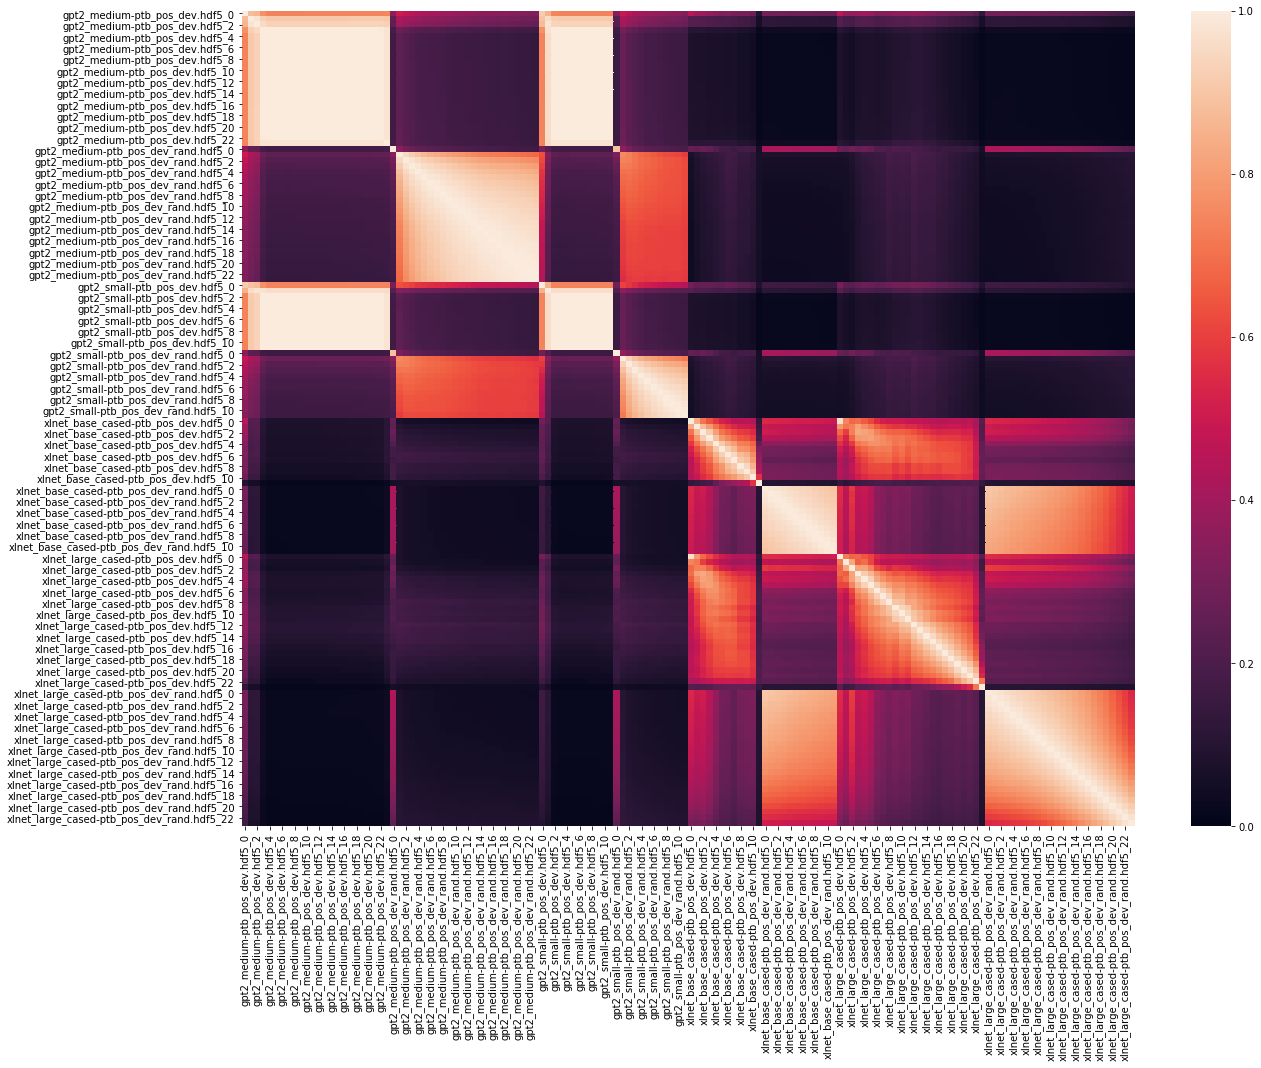

In [104]:
# lincka
sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1)

In [105]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.png".format(fname_prefix, fl)
    try:
        im = plt.imread(fname)
        plt.imshow(im)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        sns.heatmap(df.fillna(1), vmin=0, vmax=1)
        # sns.heatmap(df.fillna(1), )
        plt.savefig(fname, transparent=True)
        plt.show()

In [106]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_pw13_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [107]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_sv13_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [108]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(network_l)
maxmin_corrs_df = maxmin_corrs_df.reindex(network_l, axis=1)
# maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_maxmincorr_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [109]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(network_l)
linreg_corrs_df = linreg_corrs_df.reindex(network_l, axis=1)
# linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_linregcorr_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [110]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [111]:
# comparing models
# use lincka
model1 = "xlnet"
model2 = "xlnet"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

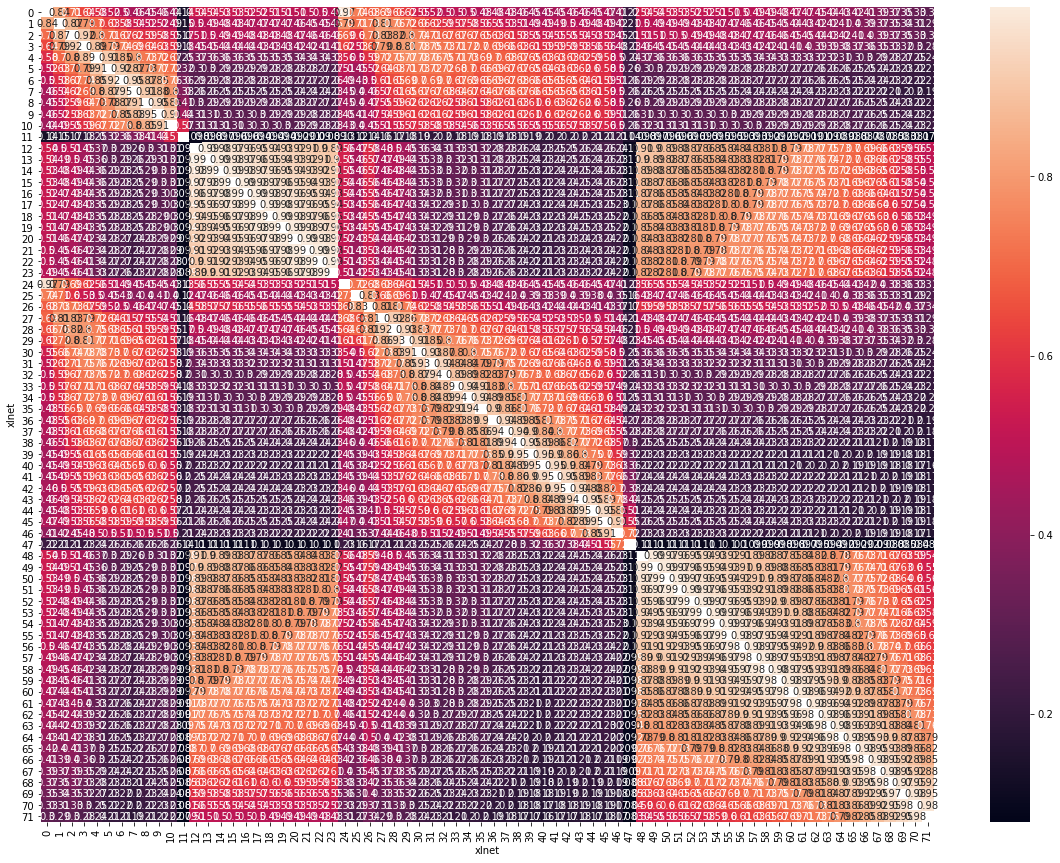

In [ ]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()